In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [4]:
ticker1 = "TSLA"

start1 = dt.date(2019, 1, 1)
end1  = dt.date(2024, 1, 1)

ticker1_data = yf.download(ticker1, start = start1, end = end1)
ticker1_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


[*********************100%%**********************]  1 of 1 completed
               Price   Fast_MA   Slow_MA  Signal  Position
Date                                                      
2011-04-12  1.643333  1.597293  1.581757     1.0       1.0
2011-11-03  2.164000  1.740320  1.732907     1.0       1.0
            Price   Fast_MA   Slow_MA  Signal  Position
Date                                                   
2011-08-26  1.582  1.787427  1.788893     0.0      -1.0


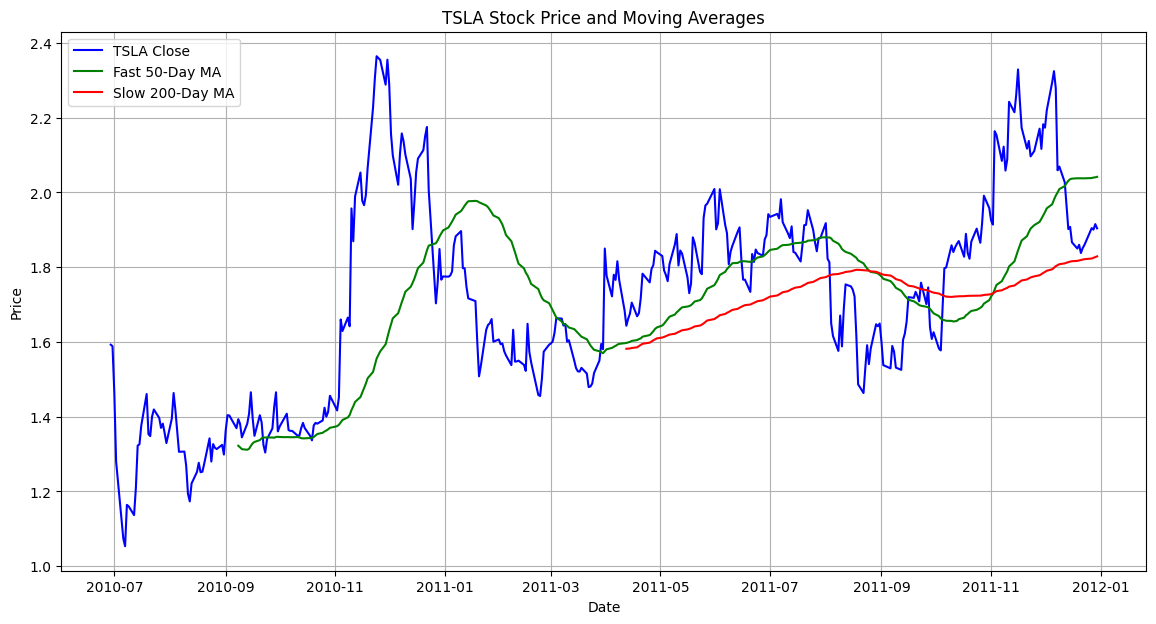

In [5]:
ticker1 = "TSLA"
start1 = dt.date(2010, 1, 1)
end1 = dt.date(2012, 1, 1)

# Download stock data
ticker1_data = yf.download(ticker1, start=start1, end=end1)

# Calculate moving averages
fast_window = 50
slow_window = 200
ticker1_data['Fast_MA'] = ticker1_data['Close'].rolling(window=fast_window).mean()
ticker1_data['Slow_MA'] = ticker1_data['Close'].rolling(window=slow_window).mean()

# Detect crossovers
crossovers = pd.DataFrame(index=ticker1_data.index)
crossovers['Price'] = ticker1_data['Close']
crossovers['Fast_MA'] = ticker1_data['Fast_MA']
crossovers['Slow_MA'] = ticker1_data['Slow_MA']
crossovers['Signal'] = 0.0
crossovers['Signal'] = np.where(crossovers['Fast_MA'] > crossovers['Slow_MA'], 1.0, 0.0)

# Find crossover points
crossovers['Position'] = crossovers['Signal'].diff()

# Show the dates of the crossovers
print(crossovers.loc[crossovers['Position'] == 1])  # Bullish crossovers
print(crossovers.loc[crossovers['Position'] == -1])  # Bearish crossovers


# Plot the closing price along with the moving averages
plt.figure(figsize=(14, 7))  # Set the figure size
plt.plot(ticker1_data['Close'], label='TSLA Close', color='blue')  # Plot the closing price
plt.plot(ticker1_data['Fast_MA'], label=f'Fast {fast_window}-Day MA', color='green')  # Plot the fast moving average
plt.plot(ticker1_data['Slow_MA'], label=f'Slow {slow_window}-Day MA', color='red')  # Plot the slow moving average

# Add title and labels
plt.title('TSLA Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the legend
plt.legend()

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

